# Reference Solution for Assignment 1

The following command could help you check if you're using a high-RAM runtime

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')


### Preparing the IMDB data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) # use top 10,000 more frequently occurring words among 50000 reviews
# convert sequence to tensor, by creating a matrix_(number of reviews in data)*10000
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Create training-validation-testing dataset
x_train = vectorize_sequences(train_data) # matrix_25000*10000
x_test = vectorize_sequences(test_data) # matrix_25000*10000
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000] # validation set contains 10000 obs
partial_x_train = x_train[10000:] # training set contains 15000 obs
y_val = y_train[:10000] # validation set
partial_y_train = y_train[10000:] # training set

17464789/17464789 [==============================] - 0s 0us/step


### Building your model

We use 20 epochs for the initial run to train the models. Then, we utilize the loss value and accuracy plots for each model to determine the best number of epochs, which is 6, and run the models with 6 epochs for the second time.      
Since the neural network utilizing implements stochastic learning, the model produces different validation and test accuracies each time it is run. To arrive at the validation and test accuracies for each model, we will perform 5 runs
and take the average of 5 runs.     

**Setting Up Model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

baseline_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_hidden_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_hidden_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_units_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_units_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_tanh = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
from tensorflow.keras import regularizers
model_regularizers = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),activation="relu"), # or regularizers.l1(0.001) or regularizers.l1_l2(l1=0.001, l2=0.001)
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_units_4 = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
model_units_512 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])

**Compiling the model**

In [ ]:
baseline_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_hidden_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_hidden_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_units_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_units_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_regularizers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_units_4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_units_512.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Training your model**

In [ ]:
# Set model name
setattr(baseline_model, 'model_name', "baseline_model")
setattr(model_hidden_1, 'model_name', "model_hidden_1")
setattr(model_hidden_3, 'model_name', "model_hidden_3")
setattr(model_units_32, 'model_name', "model_units_32")
setattr(model_units_64, 'model_name', "model_units_64")
setattr(model_tanh, 'model_name', "model_tanh")
setattr(model_mse, 'model_name', "model_mse")
setattr(model_dropout, 'model_name', "model_dropout")
setattr(model_regularizers, 'model_name', "model_regularizers")
setattr(model_units_4, 'model_name', "model_units_4")
setattr(model_units_512, 'model_name', "model_units_512")

from collections import defaultdict
import pandas as pd

i = 0
for m in [baseline_model, model_hidden_1, model_hidden_3, model_units_32, model_units_64, model_tanh, model_mse, model_dropout, model_regularizers, model_units_4, model_units_512]:
  history = m.fit(partial_x_train,
                    partial_y_train,
                    # epochs=20, # First time run with 20 epochs. Based on plots below, we chose to use 6 epochs to enhance accuracy.
                    epochs=6, # Second time use 6 epochs.
                    batch_size=512, # 15000/512=29.29~30 batches in total
                    validation_data=(x_val, y_val))
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]

  test_loss, test_acc = m.evaluate(x_test, y_test)

  if i==0:
    df = pd.DataFrame({})
  df0 = pd.DataFrame({
      'model': [m.model_name]*len(loss_values),
      'loss_values': loss_values,
      'val_loss_values': val_loss_values,
      'acc': acc,
      'val_acc': val_acc,
      'test_loss': test_loss,
      'test_acc': test_acc
      })
  df = pd.concat([df, df0])
  i +=1
df.reset_index(drop=True)
# df.to_csv('df_6epoch.csv')
# download result df to local
# from google.colab import files
# files.download("df_6epoch.csv")


Epoch 1/6
30/30 [==============================] - 2s 46ms/step - loss: 0.5647 - accuracy: 0.7459 - val_loss: 0.4514 - val_accuracy: 0.8371
Epoch 2/6
30/30 [==============================] - 0s 14ms/step - loss: 0.3652 - accuracy: 0.8895 - val_loss: 0.3386 - val_accuracy: 0.8794
Epoch 3/6
30/30 [==============================] - 0s 13ms/step - loss: 0.2721 - accuracy: 0.9136 - val_loss: 0.3008 - val_accuracy: 0.8831
Epoch 4/6
30/30 [==============================] - 0s 13ms/step - loss: 0.2197 - accuracy: 0.9274 - val_loss: 0.2852 - val_accuracy: 0.8866
Epoch 5/6
30/30 [==============================] - 0s 13ms/step - loss: 0.1822 - accuracy: 0.9414 - val_loss: 0.2760 - val_accuracy: 0.8875
Epoch 6/6
782/782 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8832
Epoch 1/6
30/30 [==============================] - 2s 45ms/step - loss: 0.5117 - accuracy: 0.7890 - val_loss: 0.4096 - val_accuracy: 0.8614
Epoch 2/6
30/30 [==============================] - 0s 13ms/st

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()
# df['model'].unique()

,model,loss_values,val_loss_values,acc,val_acc,test_loss,test_acc
0,baseline_model,0.517101,0.389407,0.774200,0.8728,0.360673,0.8582
1,baseline_model,0.315794,0.337606,0.897600,0.8638,0.360673,0.8582
2,baseline_model,0.238998,0.285454,0.919867,0.8899,0.360673,0.8582
3,baseline_model,0.193902,0.295545,0.935400,0.8821,0.360673,0.8582
4,baseline_model,0.160246,0.304493,0.948067,0.8781,0.360673,0.8582


### Accuracy Summary Table

After each run, we obtain a max_acc dataframe. Save them one by one as a csv file and save it to local. Then concat 5 max_acc dataframe together to calculate average of each model group.

In [ ]:
# Save max_acc to local for each run
# df[['model', 'acc', 'val_acc', 'test_acc']].groupby('model').max()
df[['model', 'acc', 'val_acc', 'test_acc']].groupby('model').max().to_csv('max_acc_5.csv')
from google.colab import files
files.download("max_acc_5.csv")

In [ ]:
# Upload these 5 dataframe to files in the left panel and combine them together
import pandas as pd
max_acc_1 = pd.read_csv("max_acc.csv")
max_acc_1 = max_acc_1 .reset_index(drop=True)
max_acc_2 = pd.read_csv("max_acc2.csv")
max_acc_2 = max_acc_2 .reset_index(drop=True)
max_acc_3 = pd.read_csv("max_acc_3.csv")
max_acc_3 = max_acc_3 .reset_index(drop=True)
max_acc_4 = pd.read_csv("max_acc_4.csv")
max_acc_4 = max_acc_4 .reset_index(drop=True)
max_acc_5 = pd.read_csv("max_acc_5.csv")
max_acc_5 = max_acc_5 .reset_index(drop=True)
# combine 5 runs accuracy tables together
all_acc = pd.concat([max_acc_1, max_acc_2, max_acc_3, max_acc_4, max_acc_5], ignore_index=True,axis=0)
all_acc.head()

,model,acc,val_acc,test_acc
0,baseline_model,0.952600,0.8871,0.87980
1,model_dropout,0.907067,0.8893,0.88168
2,model_hidden_1,0.942333,0.8899,0.87644
3,model_hidden_3,0.956333,0.8914,0.87204
4,model_mse,0.949800,0.8881,0.87624


In [ ]:
# Calculate average accuracy for 5 runs by models
all_acc.groupby('model').mean()
# all_acc.groupby('model').mean().to_csv('all_acc_mean.csv')
# from google.colab import files
# files.download("all_acc_mean.csv")

,acc,val_acc,test_acc
model,,,
baseline_model,0.952600,0.88898,0.876200
model_dropout,0.899227,0.88532,0.880296
model_hidden_1,0.944533,0.88912,0.878792
model_hidden_3,0.956173,0.88994,0.873920
model_mse,0.946840,0.88760,0.875576
model_regularizers,0.936520,0.88646,0.866424
model_tanh,0.957947,0.88684,0.864912
model_units_32,0.957307,0.88914,0.867584
model_units_4,0.932440,0.88106,0.872304


In [ ]:
import pandas as pd
all_acc = pd.read_csv("all_acc.csv")
all_acc.head()

<Axes: title={'center': 'Average accuracy on test set for 5 runs'}, xlabel='Model', ylabel='Mean Accuracy'>

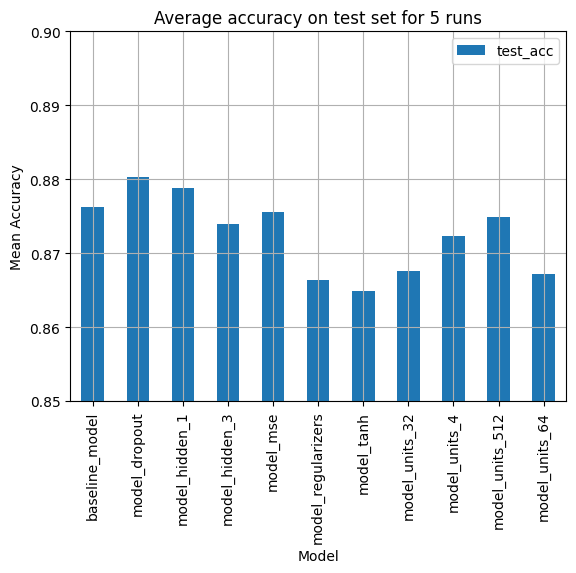

In [ ]:
# Plot bar chart for the average accuracy on test set by models
all_acc[['model', 'test_acc']].groupby('model').mean().plot(kind='bar', title='Average accuracy on test set for 5 runs', ylabel='Mean Accuracy', xlabel='Model', grid=True, ylim=(0.85, 0.9))

We observe that dropout outperforms all other model setting and obtain a test accuracy of 0.88

**You can read the saved result df from local by uploading the csv file into Files in the left panel**

In [ ]:
# import pandas as pd
# df = pd.read_csv("df.csv")
# df = df.reset_index(drop=True)
# df = df.drop(['Unnamed: 0'], axis=1)
# df.head()

,model,loss_values,val_loss_values,acc,val_acc,test_loss,test_acc
0,model,0.012725,0.566795,0.998800,0.8717,0.953613,0.85556
1,model,0.010508,0.705717,0.999000,0.8476,0.953613,0.85556
2,model,0.008363,0.611413,0.999267,0.8695,0.953613,0.85556
3,model,0.012575,0.630113,0.997267,0.8696,0.953613,0.85556
4,model,0.004455,0.644759,0.999867,0.8698,0.953613,0.85556


**Initial plots for 20 epochs**

model
model                 Axes(0.125,0.11;0.775x0.77)
model_dropout         Axes(0.125,0.11;0.775x0.77)
model_hidden_1        Axes(0.125,0.11;0.775x0.77)
model_hidden_3        Axes(0.125,0.11;0.775x0.77)
model_mse             Axes(0.125,0.11;0.775x0.77)
model_regularizers    Axes(0.125,0.11;0.775x0.77)
model_tanh            Axes(0.125,0.11;0.775x0.77)
model_units_32        Axes(0.125,0.11;0.775x0.77)
model_units_4         Axes(0.125,0.11;0.775x0.77)
model_units_512       Axes(0.125,0.11;0.775x0.77)
model_units_64        Axes(0.125,0.11;0.775x0.77)
dtype: object

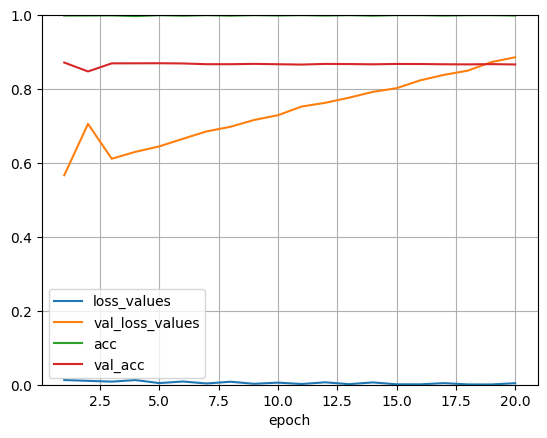

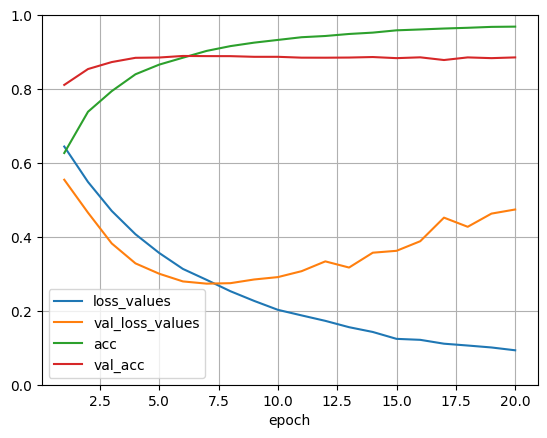

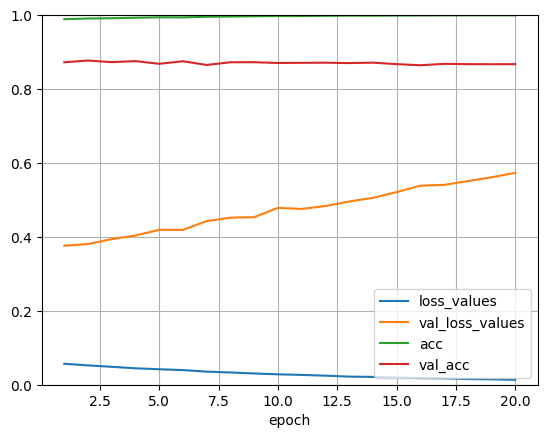

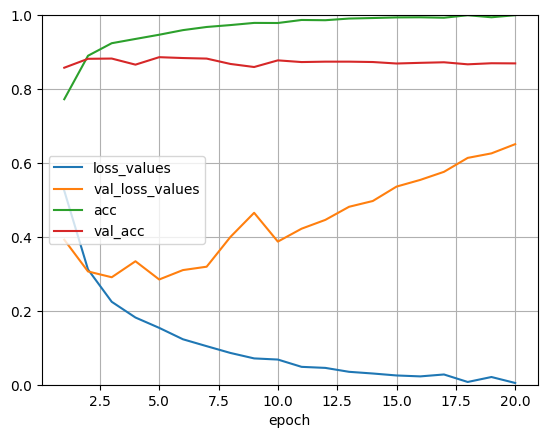

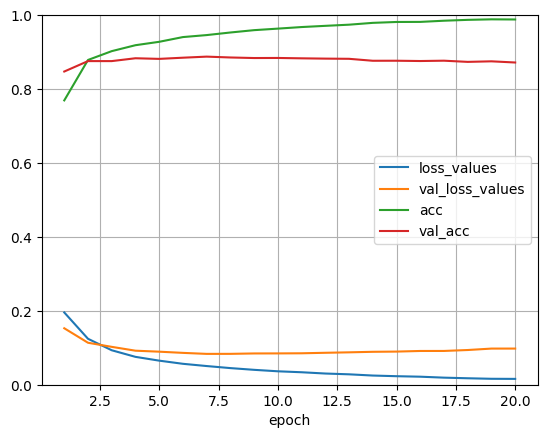

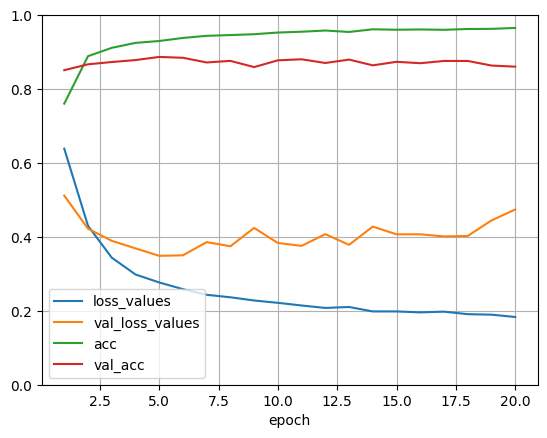

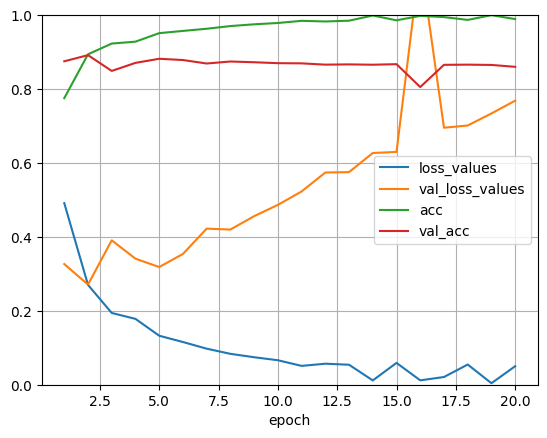

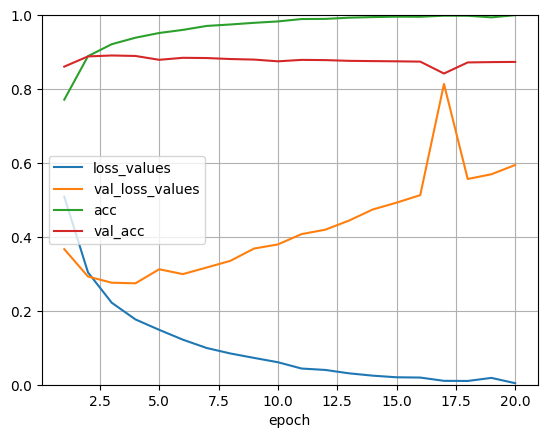

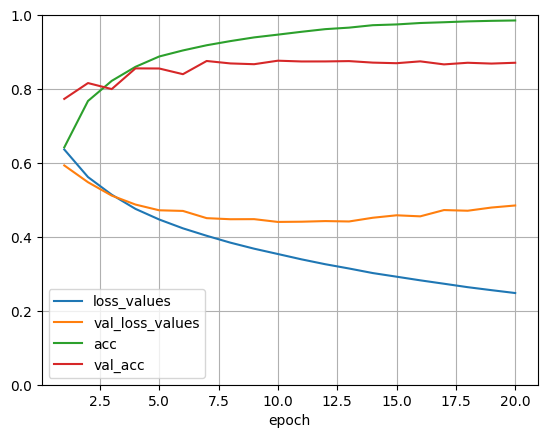

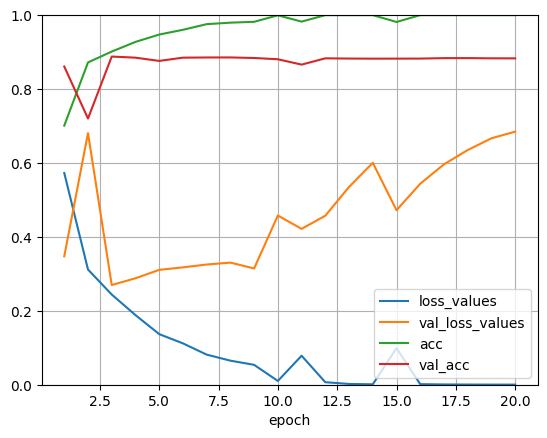

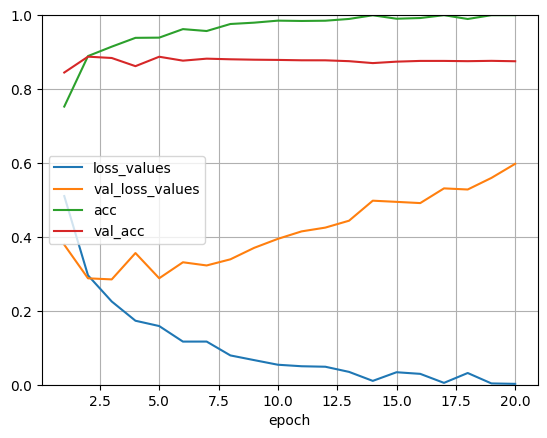

In [ ]:
import numpy as np
df['epoch'] = np.tile(np.arange(1, 21), len(df['model'].unique()))
df[['model','epoch', 'loss_values', 'val_loss_values', 'acc', 'val_acc']].set_index('epoch').groupby('model').plot(legend=True, grid=True, ylim=(0, 1))


We found that most models starts overfitting after 6 epochs (val_loss_values reachs maximum and val_acc reaches minimum before 6 epochs). Hence we run model again with epoch=6

### Plot loss values and accuracies for all models in the second run with epoch=6

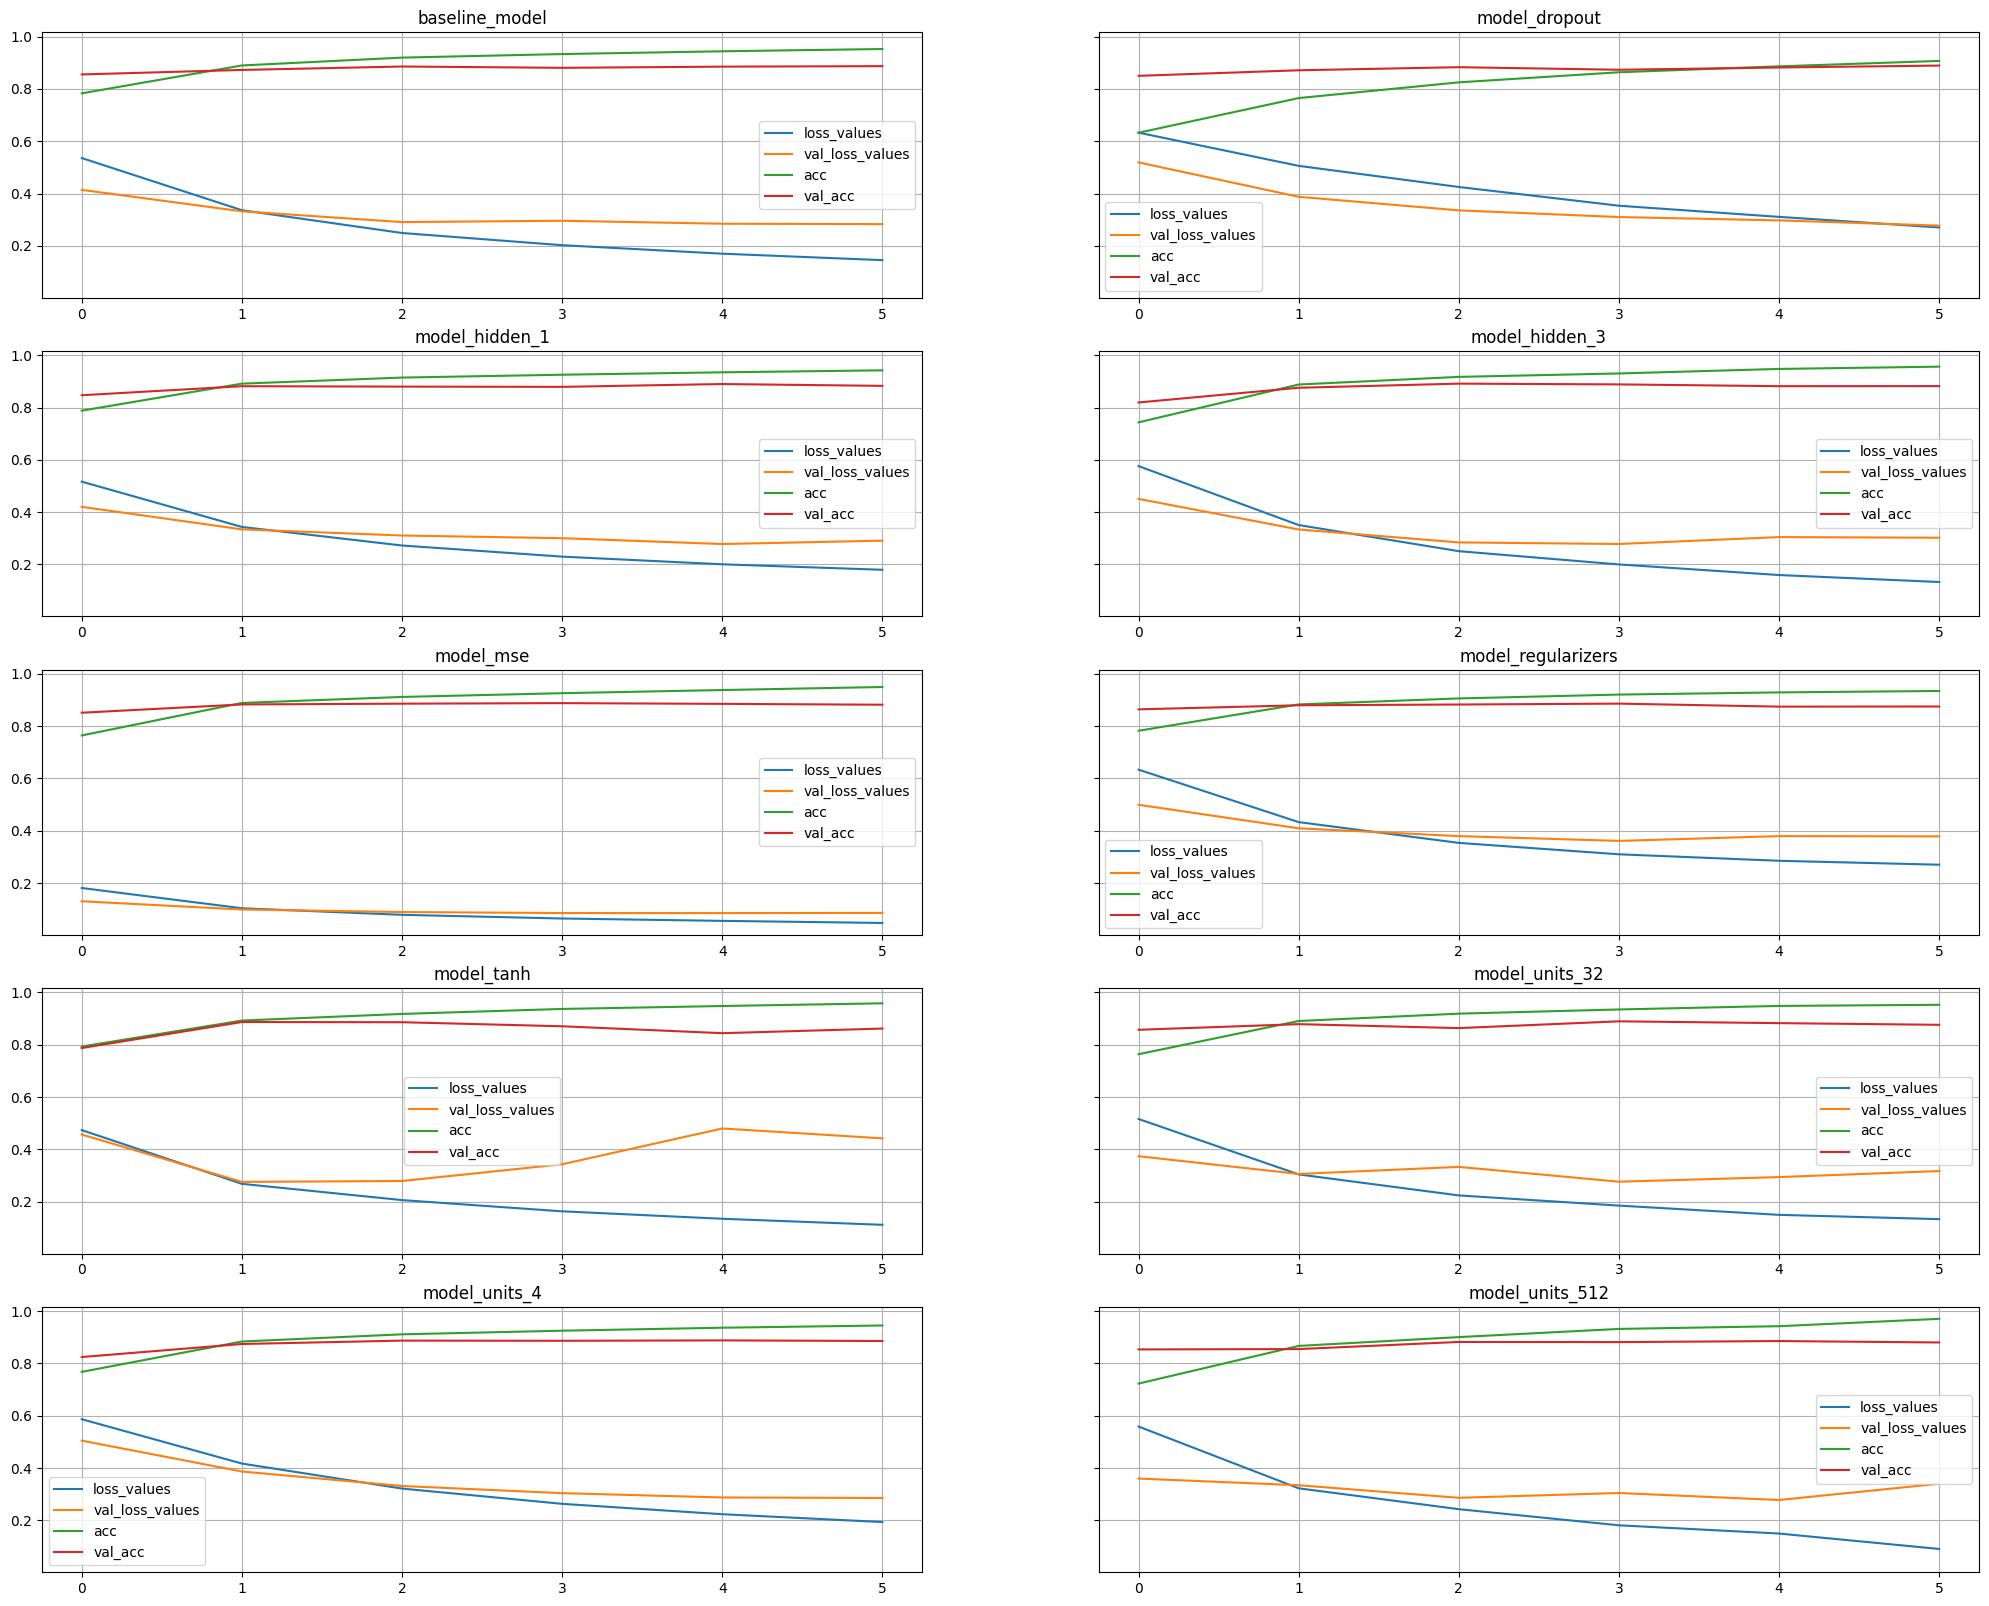

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
grouped = df[['model', 'loss_values', 'val_loss_values', 'acc', 'val_acc']].groupby('model')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25,20), sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(ax=ax, title=key, grid=True)

ax.legend()
plt.savefig('all.png')
plt.show()


from google.colab import files
files.download("all.png")

### Plot comparison plots for different model settings againest the baseline model

In [ ]:
groups = df.groupby(['model'])
group_name = df['model'].unique()
group_name

array(['baseline_model', 'model_hidden_1', 'model_hidden_3',
       'model_units_32', 'model_units_64', 'model_tanh', 'model_mse',
       'model_dropout', 'model_regularizers', 'model_units_4',
       'model_units_512'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

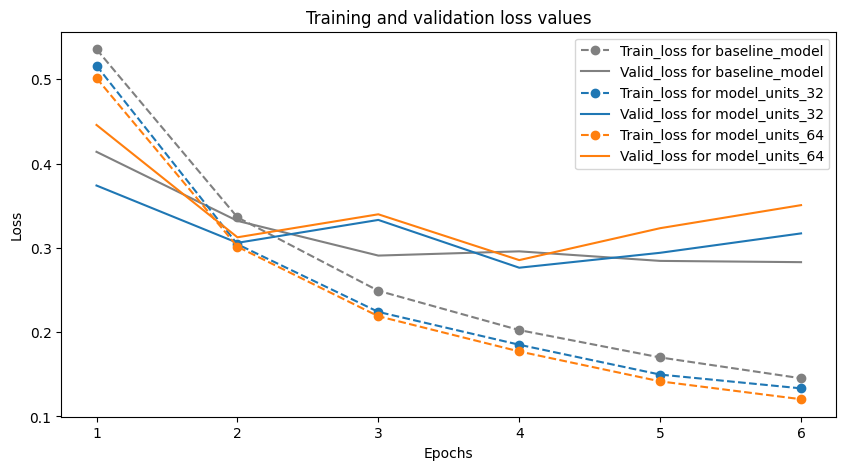

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Training and validation loss values')
colors=['grey', 'C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8']
# epochs = range(1, 21)
epochs = range(1, 7)
i=0
# for model in group_name[0:3]:
for model in [group_name[j] for j in [0,3,4]]: # [0,3,4,9,10] added units=4 and 512
# for model in [group_name[j] for j in [0,5]]:
# for model in [group_name[j] for j in [0,6]]:
# for model in [group_name[j] for j in [0,7]]:
# for model in [group_name[j] for j in [0,8]]:
  group = groups.get_group((model))
  ax.plot(epochs, group['loss_values'], color=colors[i],linestyle='dashed', marker='o', label=f"Train_loss for {model}")
  ax.plot(epochs, group['val_loss_values'], color=colors[i], label=f"Valid_loss for {model}")
  i+=1
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
# ax.legend(loc = 'upper left')
ax.legend(loc = 'upper right')
# ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))

# plt.savefig('training_valdation_loss_diff_hidden_layers.png')
plt.savefig('training_valdation_loss_diff_units.png')
# plt.savefig('training_valdation_loss_diff_active.png')
# plt.savefig('training_valdation_loss_diff_loss.png')
# plt.savefig('training_valdation_loss_drop.png')
# plt.savefig('training_valdation_loss_regular.png')
from google.colab import files
# files.download("training_valdation_loss_diff_hidden_layers.png")
files.download("training_valdation_loss_diff_units.png")
# files.download("training_valdation_loss_diff_active.png")
# files.download("training_valdation_loss_diff_loss.png")
# files.download("training_valdation_loss_drop.png")
# files.download("training_valdation_loss_regular.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

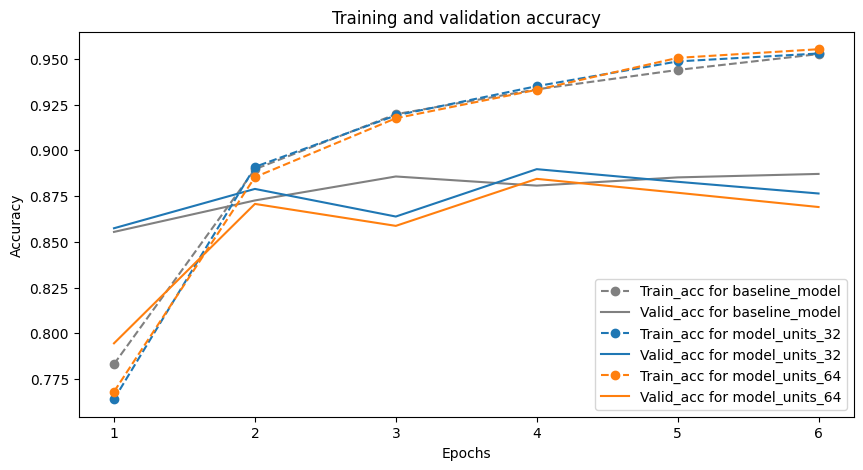

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Training and validation accuracy')
colors=['grey', 'C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8']
# epochs = range(1, 21)
epochs = range(1, 7)
i=0
# for model in group_name[:3]:
for model in [group_name[j] for j in [0,3,4]]: # [0,3,4,9,10] added units=4 and 512
# for model in [group_name[j] for j in [0,5]]:
# for model in [group_name[j] for j in [0,6]]:
# for model in [group_name[j] for j in [0,7]]:
# for model in [group_name[j] for j in [0,8]]:
  group = groups.get_group((model))
  ax.plot(epochs, group['acc'], color=colors[i],linestyle='dashed', marker='o', label=f"Train_acc for {model}")
  ax.plot(epochs, group['val_acc'], color=colors[i], label=f"Valid_acc for {model}")
  i+=1
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'lower right')
# plt.savefig('training_valdation_acc_diff_hidden_layers.png')
plt.savefig('training_valdation_acc_diff_units.png')
# plt.savefig('training_valdation_acc_diff_active.png')
# plt.savefig('training_valdation_acc_diff_loss.png')
# plt.savefig('training_valdation_acc_diff_drop.png')
# plt.savefig('training_valdation_acc_diff_regular.png')

from google.colab import files
# files.download("training_valdation_acc_diff_hidden_layers.png")
files.download("training_valdation_acc_diff_units.png")
# files.download('training_valdation_acc_diff_active.png')
# files.download('training_valdation_acc_diff_loss.png')
# files.download('training_valdation_acc_diff_drop.png')
# files.download('training_valdation_acc_diff_regular.png')


## Final Model and Summary

After comparing different model settings to the baseline model, we have decided to create a new model with the following specifications:   
* 1 hidden layer.   
* 16 units.   
* relu as the activation function.   
* Binary cross-entropy as the loss function.   
* Dropout layer.    

We will evaluate this model to determine if the test accuracy improves.

In [ ]:
final_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid") # since we want to output the probability, and the label is scalar
])
final_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
setattr(final_model, 'model_name', "final_model")
history = final_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=6,
                    batch_size=512, # 15000/512=29.29~30 batches in total
                    validation_data=(x_val, y_val))
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
test_loss, test_acc = final_model.evaluate(x_test, y_test)


Epoch 1/6
30/30 [==============================] - 3s 75ms/step - loss: 0.5831 - accuracy: 0.7291 - val_loss: 0.4769 - val_accuracy: 0.8522
Epoch 2/6
30/30 [==============================] - 1s 38ms/step - loss: 0.4475 - accuracy: 0.8318 - val_loss: 0.3943 - val_accuracy: 0.8690
Epoch 3/6
30/30 [==============================] - 2s 53ms/step - loss: 0.3742 - accuracy: 0.8644 - val_loss: 0.3480 - val_accuracy: 0.8777
Epoch 4/6
30/30 [==============================] - 1s 45ms/step - loss: 0.3304 - accuracy: 0.8844 - val_loss: 0.3162 - val_accuracy: 0.8840
Epoch 5/6
30/30 [==============================] - 1s 35ms/step - loss: 0.2925 - accuracy: 0.8983 - val_loss: 0.2973 - val_accuracy: 0.8865
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8824


In [ ]:
test_loss, test_acc

(0.2982447147369385, 0.8824399709701538)

It turns out the final model outperforms previous models and reaches an accuracy of 0.8824 in the test set.